 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [77]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [78]:
# Reading whale returns, set date as a datetime index
whale_returns_csv = Path("../Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [79]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [80]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [81]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df.sort_index(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [82]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [83]:
# Drop nulls
algo_returns_df.dropna(inplace= True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [84]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [85]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [86]:
# Fix Data Types, remove $ sign from the numerical value
sp500_history_df['Close']= sp500_history_df['Close'].replace({'\$':''}, regex=True)

In [87]:
# Fix Data (Close column) Type to Float
sp500_history_df['Close']= sp500_history_df['Close'].astype(float)
sp500_history_df.dtypes

Close    float64
dtype: object

In [88]:
# Calculate Daily Returns of sp500
sp500_history_daily_return = sp500_history_df.pct_change()
sp500_history_daily_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [89]:
# Drop nulls
sp500_history_daily_return.isnull().sum()
sp500_history_daily_return.dropna(inplace=True)
sp500_history_daily_return.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [90]:
# Rename Column
column_name = ['S&P 500']
sp500_history_daily_return.columns = column_name
sp500_history_daily_return.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [91]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_daily_return], axis="columns", join="inner")
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

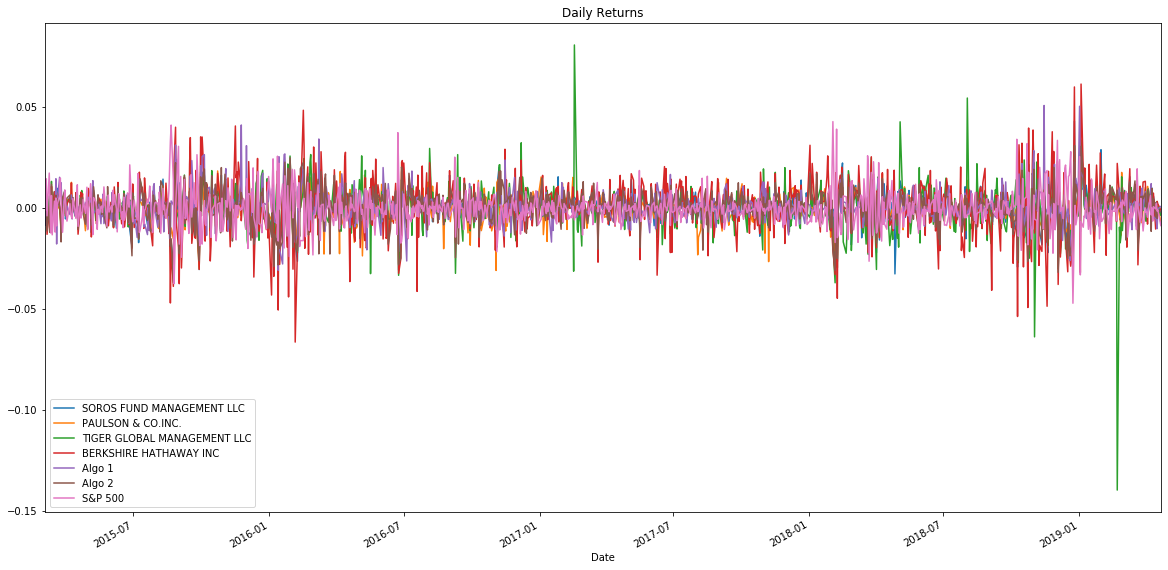

In [92]:
# Plot daily returns
combined_df.plot(figsize=(20,10), title="Daily Returns")

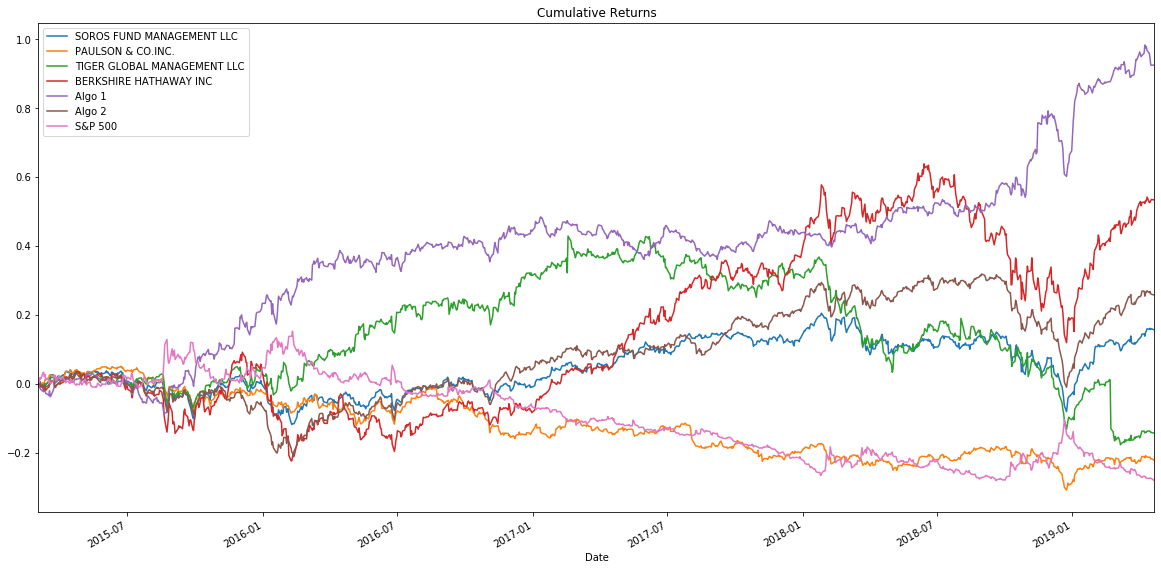

In [93]:
# Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cumulative_returns_combined = (1 + combined_df).cumprod() -1
cumulative_returns_combined.head()

# Plot cumulative returns
cumulative_returns_combined.plot(figsize=(20, 10), title="Cumulative Returns")

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

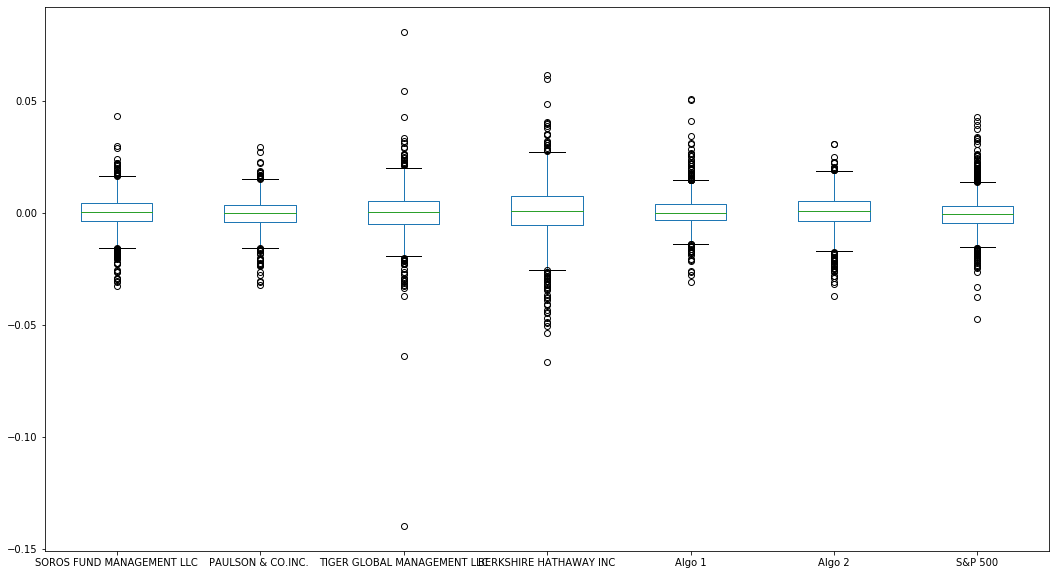

In [94]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(18,10))

In [95]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
combined_df_sd = combined_df.std()
combined_df_sd

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [96]:
# Determine which portfolios are riskier than the S&P 500
for x in combined_df_sd:
    if x <= combined_df_sd[6]:
        print('False')
    else: 
        print('True')
        
    

False
False
True
True
False
False
False


In [97]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standard_deviation = combined_df.std() * np.sqrt(252)
annualized_standard_deviation

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

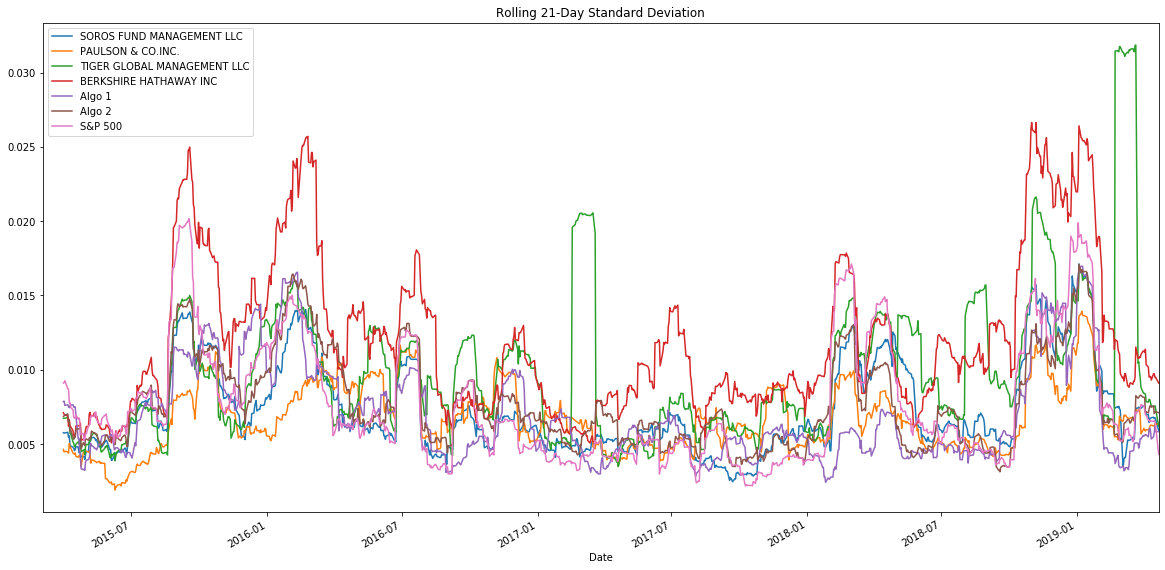

In [98]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
rolling_sd = combined_df.rolling(window=21).std()
rolling_sd.plot(figsize=(20, 10), title='Rolling 21-Day Standard Deviation')

In [99]:
# Correlation
combined_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


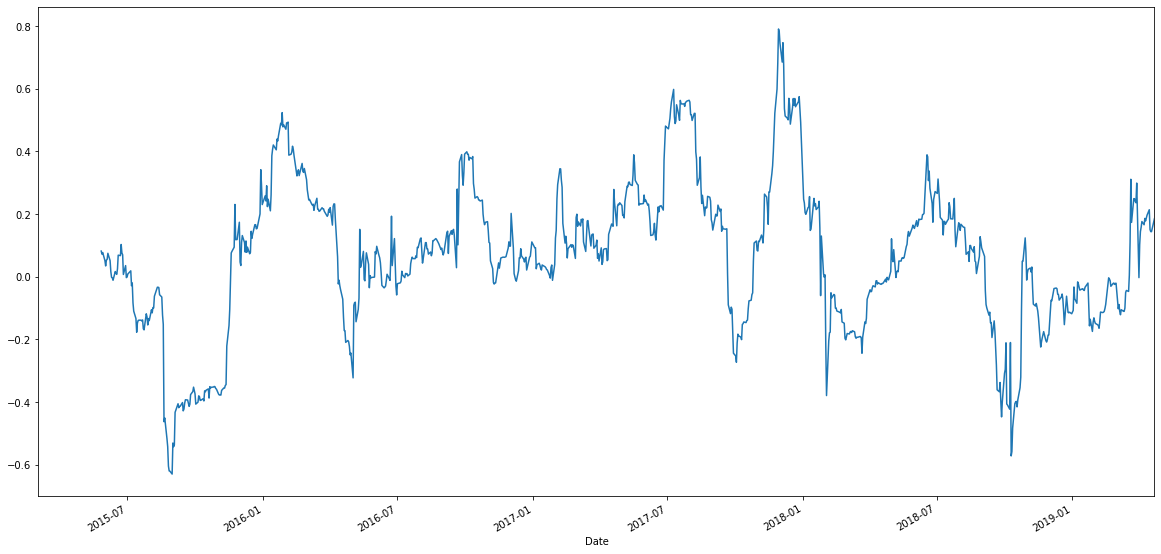

In [100]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
berkshire_hathaway_covariance=combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_df['S&P 500'])
variance= combined_df['S&P 500'].rolling(window=60).var()
berkshire_hathaway_beta= berkshire_hathaway_covariance / variance
berkshire_hathaway_beta.plot(figsize=(20,10))

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

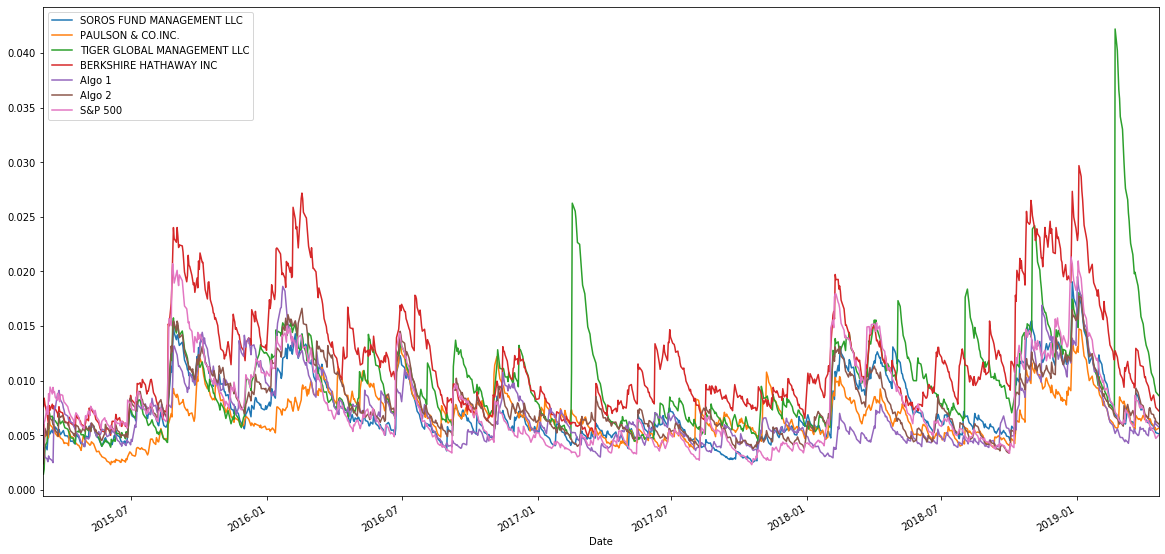

In [101]:
ewma_21_day=combined_df.ewm(span=21,adjust=False).std()
ewma_21_day.plot(figsize=(20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [102]:
# Annualzied Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

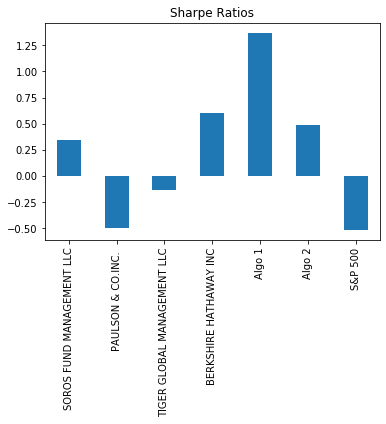

In [103]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [104]:
# Read the first stock
google_returns_csv = Path("../Resources/goog_historical.csv")
google_returns_df = pd.read_csv(google_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
google_returns_df.sort_index(inplace=True)
google_returns_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [105]:
# Read the second stock
apple_returns_csv = Path("../Resources/aapl_historical.csv")
apple_returns_df = pd.read_csv(apple_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
apple_returns_df.sort_index(inplace=True)
apple_returns_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [106]:
# Read the third stock
bx_returns_csv = Path("../../../../../Pandas/Blackstone_historical.csv")
bx_returns_df = pd.read_csv(bx_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
bx_returns_df.sort_index(inplace=True)
bx_returns_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,BX,31.47
2018-05-14,BX,31.18
2018-05-15,BX,31.10
2018-05-16,BX,31.29
2018-05-17,BX,31.45


In [107]:
# Concatenate all stocks into a single DataFrame
new_combined_df = pd.concat([google_returns_df, apple_returns_df, bx_returns_df], axis="rows", join="inner")
new_combined_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [108]:
# Reset the index
new_combined_df = new_combined_df.reset_index()

In [109]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
new_combined_df = new_combined_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
new_combined_df.head()

Symbol,AAPL,BX,GOOG
Trade DATE,,,
2018-05-11,188.59,31.47,1098.26
2018-05-14,188.15,31.18,1100.20
2018-05-15,186.44,31.10,1079.23
2018-05-16,188.18,31.29,1081.77
2018-05-17,186.99,31.45,1078.59


In [110]:
# Count Nulls
new_combined_df.isnull().sum()

Symbol
AAPL    92
BX       0
GOOG    92
dtype: int64

In [111]:
# Drop Nulls
new_combined_df.dropna(inplace=True)
new_combined_df.head()

Symbol,AAPL,BX,GOOG
Trade DATE,,,
2018-05-11,188.59,31.47,1098.26
2018-05-14,188.15,31.18,1100.20
2018-05-15,186.44,31.10,1079.23
2018-05-16,188.18,31.29,1081.77
2018-05-17,186.99,31.45,1078.59


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [112]:
# Calculate weighted portfolio returns
daily_return_combined_df = new_combined_df.pct_change()
weights = [1/3, 1/3, 1/3]
portfolio_returns = daily_return_combined_df.dot(weights)
portfolio_returns.head()

Trade DATE
2018-05-11         NaN
2018-05-14   -0.003261
2018-05-15   -0.010238
2018-05-16    0.005932
2018-05-17   -0.001383
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [113]:
final_portfolio_returns_df = pd.concat([combined_df, daily_return_combined_df], axis='columns', join='inner')
final_portfolio_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL,BX,GOOG
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,NaN,NaN,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,-0.002333,-0.009215,0.001766
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009088,-0.002566,-0.019060
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009333,0.006109,0.002354
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.006324,0.005113,-0.002940


In [114]:
# Only compare dates where the new, custom portfolio has dates
final_portfolio_returns_df.shape

(237, 10)

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [115]:
# Risk
annualized_standard_deviation = final_portfolio_returns_df.std()*np.sqrt(252)
annualized_standard_deviation

SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
Algo 1                         0.133645
Algo 2                         0.139204
S&P 500                        0.152147
AAPL                           0.297235
BX                             0.274762
GOOG                           0.255747
dtype: float64

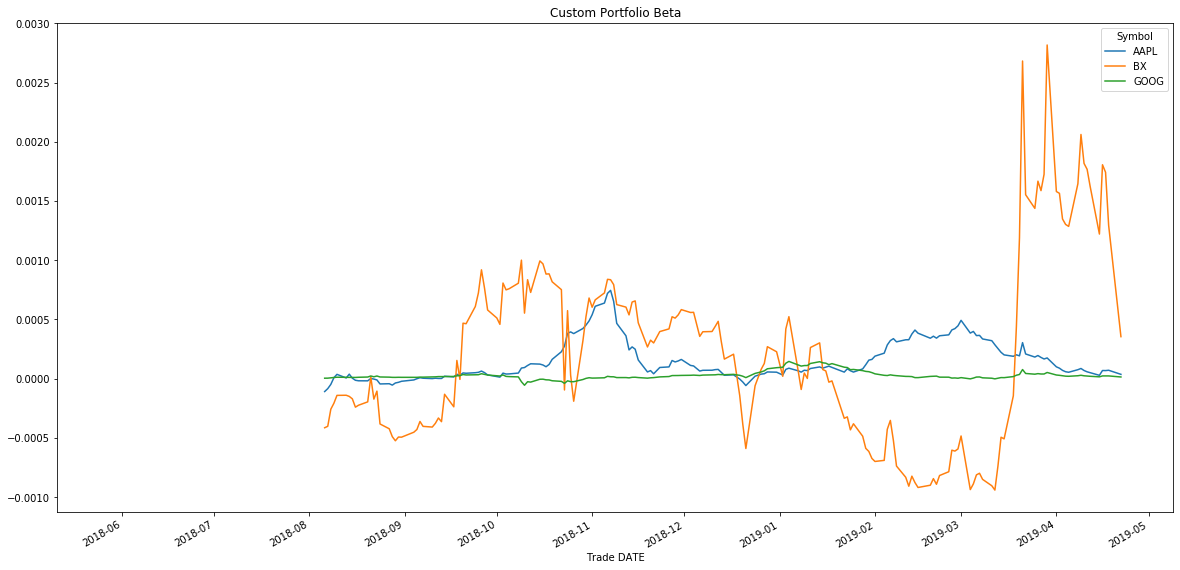

In [116]:
# Beta
custom_portfolio_covariance=new_combined_df.rolling(window=60).cov(combined_df['S&P 500'])
variance= new_combined_df.rolling(window=60).var()
custom_portfolio_beta= custom_portfolio_covariance / variance
custom_portfolio_beta.plot(figsize=(20,10), title='Custom Portfolio Beta')

In [117]:
# Annualzied Sharpe Ratios
sharpe_ratios = (final_portfolio_returns_df.mean() * 252) / (final_portfolio_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
S&P 500                       -0.432942
AAPL                           0.440644
BX                             0.972850
GOOG                           0.663844
dtype: float64

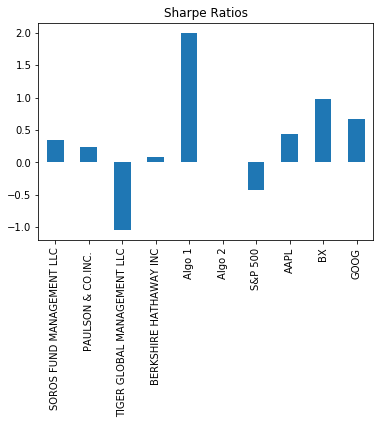

In [118]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title= 'Sharpe Ratios')

## Include correlation analysis to determine which stocks (if any) are correlated

In [119]:
final_portfolio_returns_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL,BX,GOOG
SOROS FUND MANAGEMENT LLC,1.000000,0.791031,0.476938,0.816190,0.336890,0.861989,-0.028091,0.608203,0.638126,0.682174
PAULSON & CO.INC.,0.791031,1.000000,0.484917,0.650132,0.360668,0.783856,-0.059893,0.544385,0.518543,0.553574
TIGER GLOBAL MANAGEMENT LLC,0.476938,0.484917,1.000000,0.323931,0.113568,0.408381,0.005812,0.333839,0.362585,0.289959
BERKSHIRE HATHAWAY INC,0.816190,0.650132,0.323931,1.000000,0.326025,0.781894,-0.038751,0.693263,0.583074,0.823946
Algo 1,0.336890,0.360668,0.113568,0.326025,1.000000,0.364440,-0.054454,0.223292,0.166843,0.271730
Algo 2,0.861989,0.783856,0.408381,0.781894,0.364440,1.000000,-0.042549,0.638438,0.631154,0.681320
S&P 500,-0.028091,-0.059893,0.005812,-0.038751,-0.054454,-0.042549,1.000000,0.090390,-0.035639,-0.033106
AAPL,0.608203,0.544385,0.333839,0.693263,0.223292,0.638438,0.090390,1.000000,0.433681,0.691782
BX,0.638126,0.518543,0.362585,0.583074,0.166843,0.631154,-0.035639,0.433681,1.000000,0.509583
GOOG,0.682174,0.553574,0.289959,0.823946,0.271730,0.681320,-0.033106,0.691782,0.509583,1.000000


#### Performance Analysis

1. Calculate and plot cumulative returns. Does any portfolio outperform the S&P 500?

    Tiger Global Management LLC and Berkshire Hathaway Inc


#### Risk Analysis

1. Create a box plot for each of the returns. Which box has the largest spread? Which has the smallest spread?

    The largest spread: Tiger Global Management LLC
    The smallest spread: Algo2 

2. Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?

    Soros Fund Management LLC , Paulson & Co. Inc , Algo1 , Algo2

#### Rolling Statistics

1. Plot the rolling standard deviation of the firm's portfolios along with the rolling standard deviation of the S&P 500. Does risk increase for each of the portfolios at the same time risk increases in the S&P?

    No, risks in the portfolios like Tiger Global Management LLC, Berkshire Hathaway Inc., Algo1, and Algo2 significantly increase while the S&P 500 decrease during the years. The others are positive correlated to the S&P 500.

2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?

    Paulson & Co. Inc

3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
    
    For Berkshire Hathaway, in various periods where beta is between 0 to 1, the portfolio is moving in the same direction as the market (with less volatility). In case between -1 to 0, it is moving in the opposite direction of the market. 
